# Importing phase

In [1]:
import math

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow_docs.vis import embed
import numpy as np
import cv2

# import UUID library
import uuid

# Import matplotlib libraries
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.patches as patches

# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras

import skimage
from skimage.transform import resize
from sklearn.model_selection import train_test_split

import pandas as pd
import seaborn as sns

import os


2022-12-28 17:39:56.430353: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-28 17:39:56.635525: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-28 17:39:57.524567: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-28 17:39:57.524605: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not l

# Model Implementation

## Helping functions

In [2]:
 #xxx

In [3]:
## Model definition

In [4]:
batch_size = 64
imageSize = 10
num_classes = 2
train_dir = 'dataset/train/'

def get_data(folder):
    imageArraySize = 0
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            for image_filename in os.listdir(folder + folderName):
                imageArraySize += 1

    x = np.empty((imageArraySize, imageSize, imageSize, 3), dtype=np.float32)
    y = np.full((imageArraySize),-1, dtype=int)
    i = 0
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['0']:
                label = 0
            elif folderName in ['1']:
                label = 1
            for image_filename in os.listdir(folder + folderName):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    # convert to black and white
                    img_file = cv2.cvtColor(img_file,cv2.COLOR_BGR2GRAY)
                    (null,img_file) = cv2.threshold(img_file,127,255,cv2.THRESH_BINARY)
                    # resizing image
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file).reshape((-1, imageSize, imageSize, 3))

                    x[i] = img_arr
                    y[i] = label
                    i+=1
    return x,y

In [5]:
x_train, y_train = get_data(train_dir)
# getting a unique identifier for the dataset, used as name for the final weights
datasetName = str(uuid.uuid5(uuid.NAMESPACE_DNS,str((x_train,y_train))))
X_data = x_train
y_data = y_train
print("Images successfully imported...")
print("shape of X_train: ", x_train)
print("shape of Y_train: ", y_train)

Images successfully imported...
shape of X_train:  [[[[9.85136032e-01 9.85136032e-01 9.85136032e-01]
   [7.39048362e-01 7.39048362e-01 7.39048362e-01]
   [3.10228020e-01 3.10228020e-01 3.10228020e-01]
   ...
   [1.66755132e-02 1.66755132e-02 1.66755132e-02]
   [1.24348560e-04 1.24348560e-04 1.24348560e-04]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]]

  [[9.99444127e-01 9.99444127e-01 9.99444127e-01]
   [9.81941402e-01 9.81941402e-01 9.81941402e-01]
   [8.89112890e-01 8.89112890e-01 8.89112890e-01]
   ...
   [3.26951779e-02 3.26951779e-02 3.26951779e-02]
   [2.43701841e-04 2.43701841e-04 2.43701841e-04]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]]

  [[9.99999583e-01 9.99999583e-01 9.99999583e-01]
   [9.99935091e-01 9.99935091e-01 9.99935091e-01]
   [9.98274624e-01 9.98274624e-01 9.98274624e-01]
   ...
   [6.13342598e-02 6.13342598e-02 6.13342598e-02]
   [1.22854463e-03 1.22854463e-03 1.22854463e-03]
   [6.61768063e-05 6.61768063e-05 6.61768063e-05]]

  ...

  [[9.16729569e

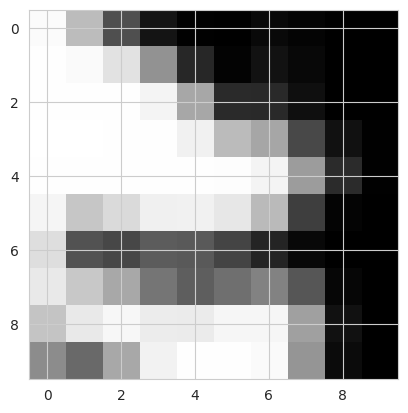

In [6]:
plt.imshow(x_train[0])
plt.show()

In [7]:
print("The shape of X_train is : ", x_train.shape)
print("The shape of y_train is : ", y_train.shape)

The shape of X_train is :  (11706, 10, 10, 3)
The shape of y_train is :  (11706,)


In [8]:
print("The shape of one image is : ", x_train[0].shape)

The shape of one image is :  (10, 10, 3)


In [9]:
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=.3, random_state=2)

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten

model = Sequential()

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [16]:
from keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import SGD

opt = SGD(learning_rate=1e-5)
early_stop = EarlyStopping(monitor='val_loss', patience=2)

epoch_number = 2000

model.compile(optimizer=opt,
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(x_train, y_train,
          epochs=epoch_number,
          batch_size=64,
          verbose=2,
          validation_data=(x_test, y_test),
          callbacks=[early_stop])

Epoch 1/2000
129/129 - 0s - loss: 0.8736 - accuracy: 0.4132 - val_loss: 0.8619 - val_accuracy: 0.4114 - 376ms/epoch - 3ms/step
Epoch 2/2000
129/129 - 0s - loss: 0.8513 - accuracy: 0.4131 - val_loss: 0.8415 - val_accuracy: 0.4137 - 132ms/epoch - 1ms/step
Epoch 3/2000
129/129 - 0s - loss: 0.8319 - accuracy: 0.4112 - val_loss: 0.8241 - val_accuracy: 0.4114 - 125ms/epoch - 973us/step
Epoch 4/2000
129/129 - 0s - loss: 0.8155 - accuracy: 0.4059 - val_loss: 0.8091 - val_accuracy: 0.4063 - 149ms/epoch - 1ms/step
Epoch 5/2000
129/129 - 0s - loss: 0.8014 - accuracy: 0.3988 - val_loss: 0.7963 - val_accuracy: 0.3938 - 192ms/epoch - 1ms/step
Epoch 6/2000
129/129 - 0s - loss: 0.7893 - accuracy: 0.3909 - val_loss: 0.7851 - val_accuracy: 0.3884 - 137ms/epoch - 1ms/step
Epoch 7/2000
129/129 - 0s - loss: 0.7788 - accuracy: 0.3958 - val_loss: 0.7757 - val_accuracy: 0.4012 - 137ms/epoch - 1ms/step
Epoch 8/2000
129/129 - 0s - loss: 0.7700 - accuracy: 0.4013 - val_loss: 0.7675 - val_accuracy: 0.4049 - 132ms

# Show model metrics

The model metrics are


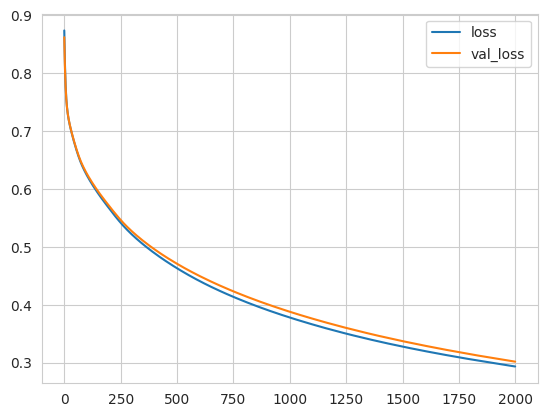

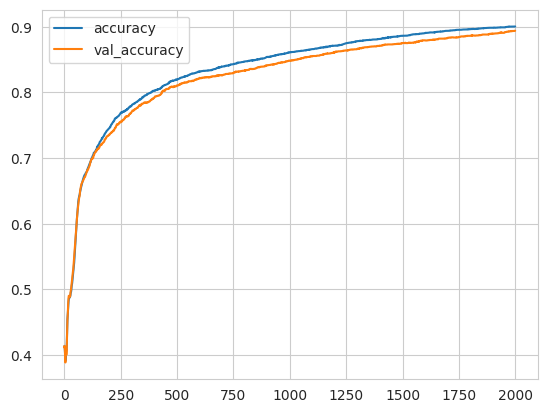

110/110 [==============================] - 0s 696us/step
Predictions done...
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1934
           1       0.91      0.85      0.88      1578

    accuracy                           0.89      3512
   macro avg       0.90      0.89      0.89      3512
weighted avg       0.89      0.89      0.89      3512



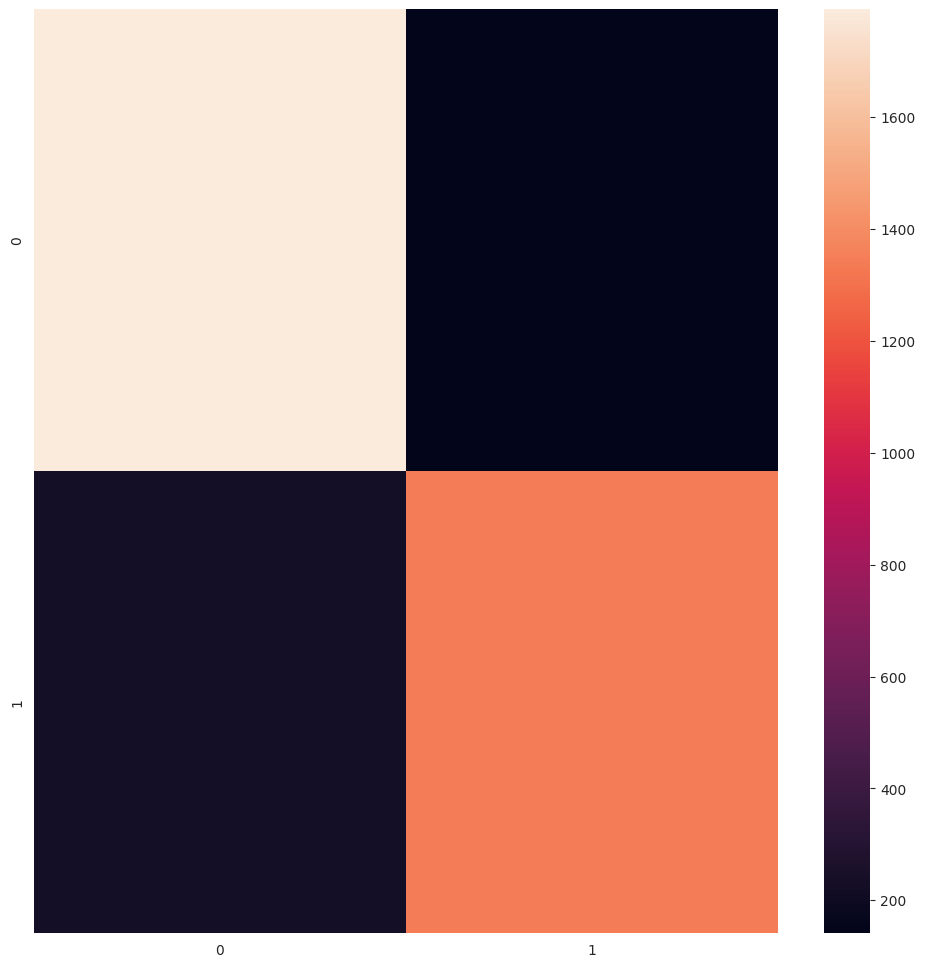

In [17]:
metrics = pd.DataFrame(model.history.history)
print("The model metrics are")
metrics
metrics[['loss', 'val_loss']].plot()
plt.show()
metrics[['accuracy', 'val_accuracy']].plot()
plt.show()

# Ccomputing model loss and accuracy
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

# Saving model
savedWeightFileName = "ArmNetWeights_"+datasetName+"_"+str(int(accuracy*100))+".h5"
model.save(savedWeightFileName)

# making prediction with the test subset
predictions = model.predict(x_test)

print("Predictions done...")
from sklearn.metrics import classification_report, confusion_matrix

y_pred = np.argmax(predictions, 1)
print(classification_report(y_test, y_pred))
plt.figure(figsize=(12, 12))
sns.heatmap(confusion_matrix(y_test, y_pred))
plt.show()

In [18]:
weights = model.get_weights()
i = 1
for layer in weights:
    output_file = open('./weights.txt','a')
    if (isinstance(layer[0], list)):
        for layer_depth in layer:
            output_file.write("{")
            output_file.write(','.join(str(x) for x in layer_depth))
            output_file.write("},")
    else:
        for weight in layer:
            output_file.app
    output_file.close()
    i+= 1


AttributeError: '_io.TextIOWrapper' object has no attribute 'app'